# Importing Libraries

In [1]:
#Importing Required Libraries
#For Data Processing
import numpy as np
import pandas as pd
#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
# Read the Excel file 
df=pd.read_excel(r"D:\DATA SCIENCE\PROJECT_FOR_DATASCIENCE\makino data.xlsx")

# Exploratory data analysis or Preprocessing

In [3]:
df.head()#Taking top 5

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2023-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2023-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2023-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2023-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2023-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [4]:
df.tail()#Taking bottom 5

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2495,2023-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,2023-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,2023-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,2023-02-01,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure
2499,2023-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,96.690000,5.936610,7.109355,29.8,53.2,36.2,0.840,31.580,23576.0,385.0,24.409551,3.55,Machine_Failure


In [5]:
df.info()#View summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2500 non-null   datetime64[ns]
 1   Machine_ID                       2500 non-null   object        
 2   Assembly_Line_No                 2500 non-null   object        
 3   Hydraulic_Pressure(bar)          2490 non-null   float64       
 4   Coolant_Pressure(bar)            2481 non-null   float64       
 5   Air_System_Pressure(bar)         2483 non-null   float64       
 6   Coolant_Temperature(°C)          2488 non-null   float64       
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64       
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64       
 9   Spindle_Vibration(µm)            2489 non-null   float64       
 10  Tool_Vibration(µm)               2489 non-null   float64    

In [6]:
df.shape#Seeing the shape 

(2500, 16)

In [7]:
df.describe()#Statical describing 

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [8]:
print(df.value_counts()) #Frequency distribution of values in variables
#Now, I will check the frequency counts of categorical variables.

Date        Machine_ID            Assembly_Line_No  Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature(°C)  Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  Voltage(volts)  Torque(Nm)  Cutting(kN)  Downtime          
2023-01-03  Makino-L1-Unit1-2013  Shopfloor-L1      64.940000                6.893182               6.684550                  24.4                     48.6                           39.2                             0.822                  27.063              19860.0             431.0           24.038369   3.58         Machine_Failure       1
2023-03-27  Makino-L1-Unit1-2013  Shopfloor-L1      74.300000                4.651799               6.131950                  25.8                     53.2                           33.3                             0.669                  28.005              18796.0             373.0           25.399127   2.74         

In [9]:
df.isnull()#Identifying the null values

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()# Getting the count of null values

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature(°C)            12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [11]:
df = df.drop(columns=['Date'])  # Drop the column

In [12]:
# Impute missing values with mean for numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [13]:
df.isnull().sum()#checking the  null values is filled or not

Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature(°C)            0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

In [14]:
df['Downtime'].value_counts()

Machine_Failure       1265
No_Machine_Failure    1235
Name: Downtime, dtype: int64

#  Declare feature vector and target variable

In [15]:
# Separate features and target variable
X = df.drop('Downtime', axis=1)
y = df['Downtime']

# Split data into separate training and test set

In [16]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [17]:
X_train.shape, X_test.shape

((1675, 14), (825, 14))

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Define the scaler
scaler = StandardScaler()

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Assuming you have X_train and X_test defined elsewhere
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])


# Feature Engineering

In [20]:
# check data types in X_train
X_train.dtypes

Machine_ID                          object
Assembly_Line_No                    object
Hydraulic_Pressure(bar)            float64
Coolant_Pressure(bar)              float64
Air_System_Pressure(bar)           float64
Coolant_Temperature(°C)            float64
Hydraulic_Oil_Temperature(°C)      float64
Spindle_Bearing_Temperature(°C)    float64
Spindle_Vibration(µm)              float64
Tool_Vibration(µm)                 float64
Spindle_Speed(RPM)                 float64
Voltage(volts)                     float64
Torque(Nm)                         float64
Cutting(kN)                        float64
dtype: object

In [21]:
X_train.head()#Encode categorical variables¶
#Now, I will encode the categorical variables.

,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
308,Makino-L2-Unit1-2015,Shopfloor-L2,100.512043,5.512868,6.388342,6.8,46.8,35.9,1.120,30.273,22081.0,380.0,21.620488,3.07
604,Makino-L1-Unit1-2013,Shopfloor-L1,72.890000,4.778974,6.499275,24.5,51.3,36.0,0.872,26.762,19272.0,323.0,24.771793,3.49
2154,Makino-L3-Unit1-2015,Shopfloor-L3,127.646188,3.053149,6.823975,20.7,45.3,38.6,1.501,20.630,16198.0,368.0,34.973004,2.95
2259,Makino-L3-Unit1-2015,Shopfloor-L3,103.469800,5.160644,6.305318,21.8,39.8,32.6,1.253,28.013,20763.0,412.0,22.992920,2.73
59,Makino-L2-Unit1-2015,Shopfloor-L2,168.797017,4.996191,6.177731,20.2,49.7,37.0,0.695,22.980,20066.0,439.0,23.791588,2.02


In [22]:
import category_encoders as ce
# encode categorical variables with ordinal encoding
categorical_cols = ['Machine_ID', 'Assembly_Line_No','Hydraulic_Pressure(bar)','Coolant_Pressure(bar)','Air_System_Pressure(bar)','Coolant_Temperature(°C)','Hydraulic_Oil_Temperature(°C)','Spindle_Bearing_Temperature(°C)','Spindle_Vibration(µm)','Tool_Vibration(µm)','Spindle_Speed(RPM)','Voltage(volts)','Torque(Nm)','Cutting(kN)']
encoder = ce.OrdinalEncoder(cols=categorical_cols)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [23]:
X_train.head()

,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
308,1,1,1,1,1,1,1,1,1,1,1,1,1,1
604,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2154,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2259,3,3,4,4,4,4,4,4,4,4,4,4,4,4
59,1,1,5,5,5,5,5,5,5,5,5,5,5,5


In [24]:
X_test.head()

,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature(°C),Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
1447,2,2,152.0,-1.0,249.0,42.0,37.0,9.0,229.0,251.0,7.0,63.0,7.0,54.0
1114,2,2,-1.0,321.0,-1.0,42.0,145.0,81.0,191.0,-1.0,-1.0,157.0,-1.0,54.0
1064,1,1,-1.0,1052.0,-1.0,30.0,19.0,86.0,-1.0,-1.0,3.0,24.0,13.0,74.0
2287,3,3,137.0,-1.0,-1.0,33.0,190.0,120.0,793.0,-1.0,8.0,104.0,32.0,104.0
1537,2,2,-1.0,-1.0,-1.0,104.0,126.0,163.0,-1.0,1464.0,8.0,85.0,-1.0,39.0


# Random Forest Classifier model with  parameters n_estimators=50

In [183]:
# instantiate the classifier with n_estimators = 50
rfc_50 = RandomForestClassifier(n_estimators=50, random_state=42)

# fit the model to the training set
rfc_50.fit(X_train, y_train)

# Predict on the test set results
y_pred_50 = rfc_50.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 50 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_50)))

Model accuracy score with 50 decision-trees : 0.9842


# Random Forest Classifier model with parameter n_estimators=100

In [184]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9891


# Random Forest Classifier model with parameter n_estimators=200

In [185]:
# instantiate the classifier with n_estimators = 200
rfc_200 = RandomForestClassifier(n_estimators=200, random_state=42)

# fit the model to the training set
rfc_200.fit(X_train, y_train)

# Predict on the test set results
y_pred_200 = rfc_200.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_200)))

Model accuracy score with 200 decision-trees : 0.9891


# Find important features ,accuracy score with 50,100,200 best one,cross-validation,confusion matrix,classification_report_result 
# with Random Forest model 

In [186]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best parameters and Create a best_model RandomForestClassifier
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [187]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [188]:
#Now, I will select only the important features, build the model using these features and see its effect on accuracy.
# Feature Importance
feature_importances = best_model.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Display feature importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f'{feature}: {importance:.4f}')


Torque(Nm): 0.2457
Hydraulic_Pressure(bar): 0.2318
Cutting(kN): 0.2016
Coolant_Pressure(bar): 0.1564
Spindle_Speed(RPM): 0.0755
Coolant_Temperature(°C): 0.0315
Spindle_Bearing_Temperature(°C): 0.0110
Tool_Vibration(µm): 0.0102
Spindle_Vibration(µm): 0.0088
Air_System_Pressure(bar): 0.0086
Hydraulic_Oil_Temperature(°C): 0.0083
Voltage(volts): 0.0077
Assembly_Line_No: 0.0016
Machine_ID: 0.0014


In [189]:
# Evaluate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [190]:
# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')

Cross-Validation Scores: [0.97910448 0.98507463 0.98507463 0.97910448 0.98507463]
Mean CV Accuracy: 0.9826865671641791


In [191]:
#confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[390   4]
 [  5 426]]


In [192]:
#classification_report_result
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_result)

Classification Report:
                    precision    recall  f1-score   support

   Machine_Failure       0.99      0.99      0.99       394
No_Machine_Failure       0.99      0.99      0.99       431

          accuracy                           0.99       825
         macro avg       0.99      0.99      0.99       825
      weighted avg       0.99      0.99      0.99       825



# Visualization on Traget Variable

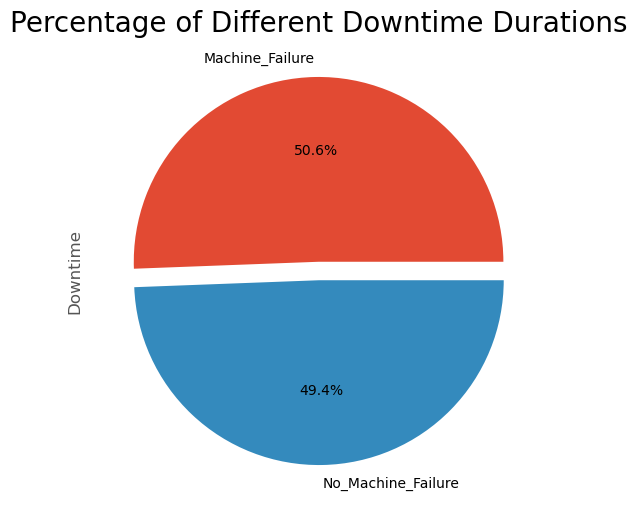

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'downtime_duration' is the column name
Y = df['Downtime'].value_counts()

plt.figure(figsize=(20,6))
plt.style.use('ggplot')
Y.plot.pie(autopct="%.1f%%", explode=[0.05]*len(Y))  # Explode based on the number of categories
plt.title('Percentage of Different Downtime Durations', fontsize=20)
plt.show()


# Visualize feature scores of the features

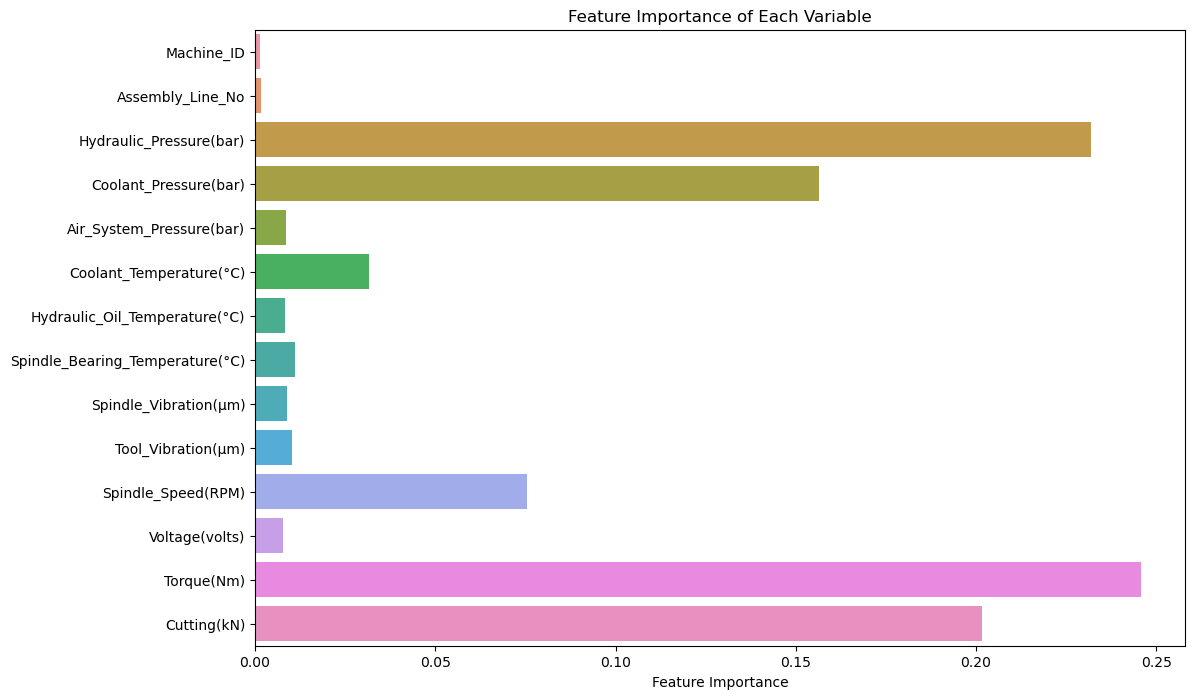

In [193]:
# Visualize Feature Importance with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=list(feature_importance_dict.values()), y=list(feature_importance_dict.keys()))
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Each Variable')
plt.show()

# Visualize Cross-Validation Scores 

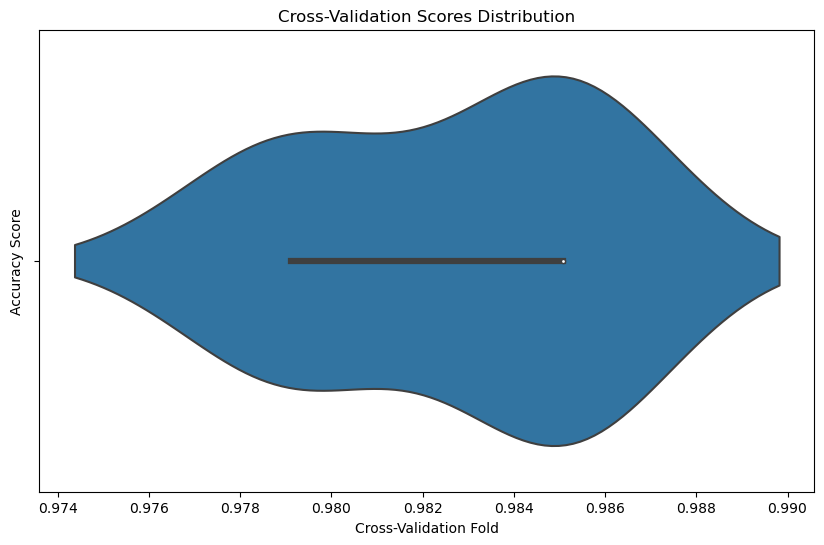

In [194]:
# Visualize Cross-Validation Scores with Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=cv_scores)
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores Distribution')
plt.show()

# Visualize the confusion matrix

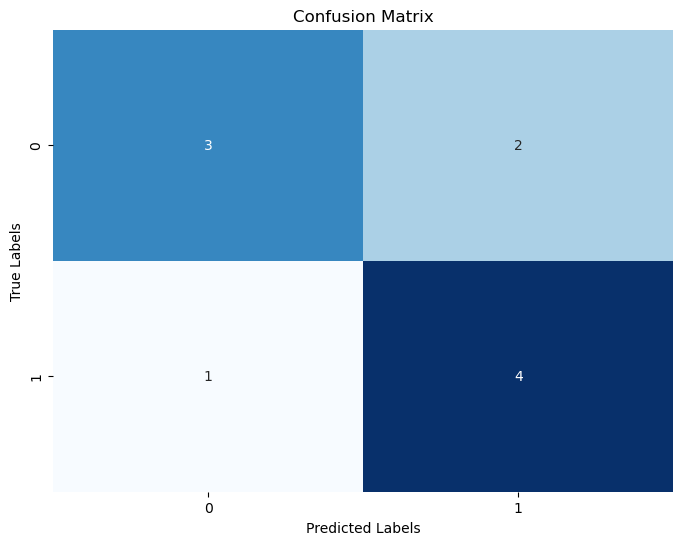

In [195]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# visualize the classification report result,precision, recall, and f1-score

<Figure size 1000x600 with 0 Axes>

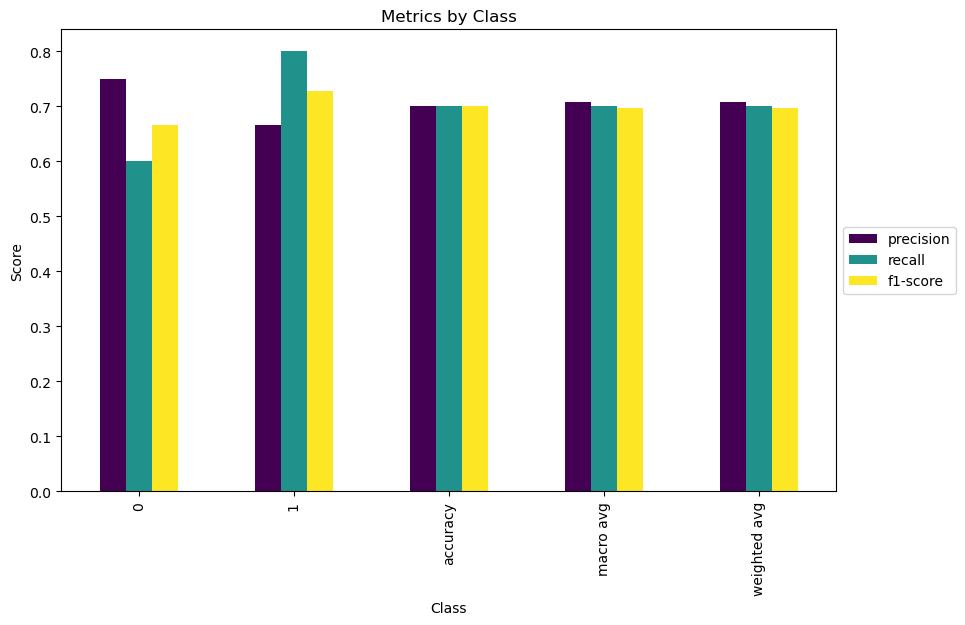

In [196]:
# Plot classification report result,precision, recall, and f1-score for each class
plt.figure(figsize=(10, 6))
metrics_by_class.plot(kind='bar', colormap='viridis', figsize=(10, 6))
plt.title('Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()